In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
from collections import OrderedDict

## Data Import

In [3]:
df = pd.read_csv('name_name.csv', dtype={"reps": np.int64, "comm" : str, "auth" : str})


## Data Cleaning

In [7]:
df = df.dropna()


0

## Sample Graph

In [8]:
dfn = df.sample(1000)
del df
df = dfn

In [9]:
graph = nx.from_pandas_edgelist(df, source = 'comm', target = 'auth', edge_attr = 'reps',create_using = nx.DiGraph())

In [12]:
pg = nx.pagerank(graph, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='reps', dangling=None)

Eigenvector centrality
HITS


## Distance

## Score neighbours

In [19]:
def check_neighbourhood(graph, node, radius):
    level = [n for n in nx.neighbors(graph, node)]
    if radius == 1:
        return level
    total_list = []
    total_list.extend(level)
    next_level = []
    radius = radius - 1;
    for i in range(radius):
        for item in level:
            m = [n for n in nx.neighbors(graph, item)]
            next_level.extend(m)
        del level[:]
        level.extend(next_level)
        total_list.extend(next_level)
        del next_level[:]
    return list(set(total_list))


In [86]:
def normalize(pg):
    dpg = pd.DataFrame([pg], columns=pg.keys())
    dpg = dpg.transpose()
    dpg = (dpg - dpg.mean()) / (dpg.max() - dpg.min())
    dpg = 2*dpg[0] + 1
    scores = dpg.to_dict()
    del dpg
    return scores

In [125]:
def score_neighbours(pg, graph, node, radius):
    pg = normalize(pg)
    path = nx.single_source_shortest_path_length(graph ,source=node,cutoff=radius)
    neighbourhood = {}
    for item in path:
        if(path[item]):
            neighbourhood[item] = pg[item]/path[item]
        else:
            neighbourhood[item] = 0
    return OrderedDict(sorted(neighbourhood.items(), key=itemgetter(1), reverse=True))        

In [123]:
def score_node(pg, gu, source, destination):
    pg = normalize(pg)
    length = nx.shortest_path_length(gu, source=source, target=destination, weight=None, method='dijkstra')
    if(length == 0):
        return 0
    return pg[destination]/length

In [165]:
def plot_aroundme(pg, graph, node, radius):
    path = nx.single_source_shortest_path_length(graph ,source=node,cutoff=radius)
    nodes = list(path.keys())
    pos = nx.spring_layout(gu)
    k = gu.subgraph(nodes)
    width = normalize(pg)
    width = list(width.values())
    plt.figure(3, figsize=(12,12))
    nx.draw(k, pos=pos, node_size=18, node_color='pink', font_size=12, alpha=0.8, with_labels = True, edge_color='b', node_shape='^')
    plt.savefig('labels_1.png')
    plt.show()
    plt.figure(1, figsize=(12,12))
    nx.draw_spectral(k,font_size=12, node_color='pink', with_labels=True, node_shape='^', edge_color='b')
    plt.savefig('labels_2.png')
    plt.show()

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


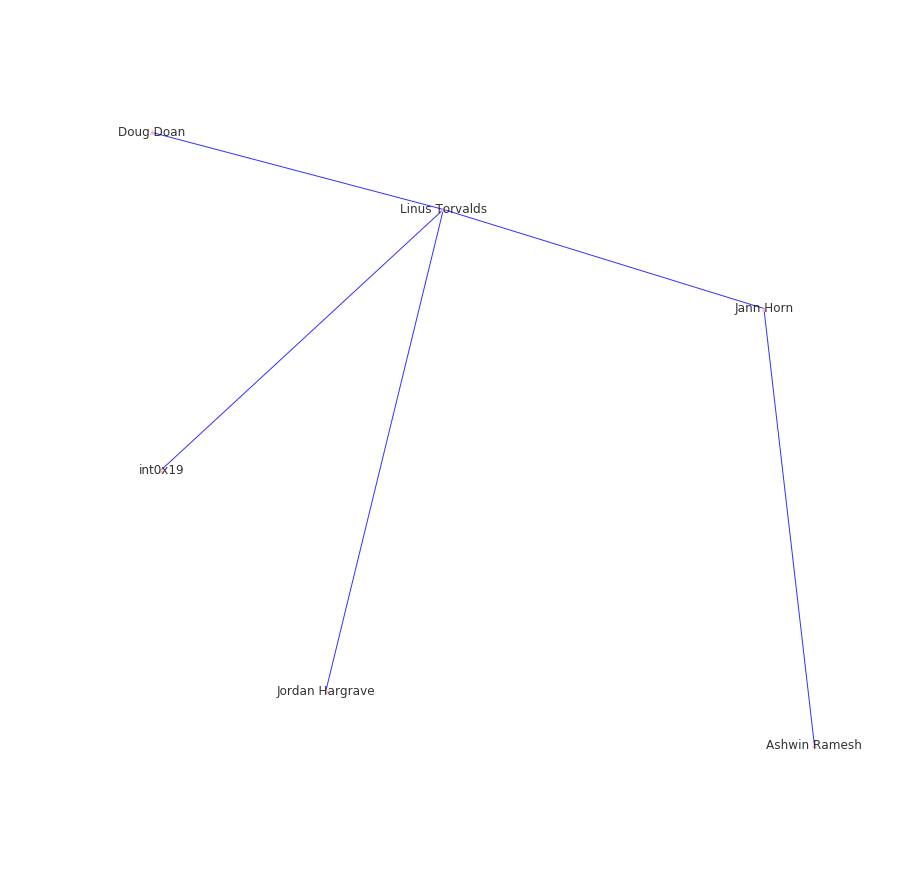

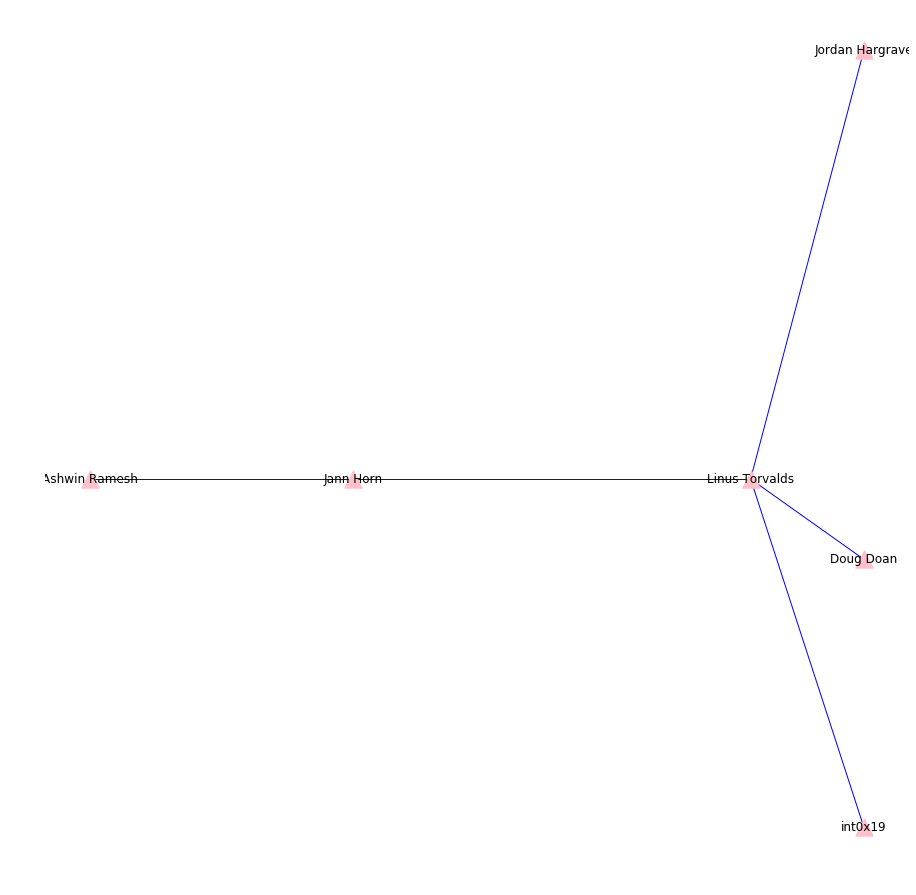

In [166]:
plot_aroundme(pg, gu, "Linus Torvalds", 2)

In [167]:
nx.single_source_shortest_path_length(gu ,source="Linus Torvalds",cutoff=2)


{'Ashwin Ramesh': 2,
 'Doug Doan': 1,
 'Jann Horn': 1,
 'Jordan Hargrave': 1,
 'Linus Torvalds': 0,
 'int0x19': 1}

In [168]:
score_node(pg, gu, "Linus Torvalds", "int0x19")

0.8408703299084588

In [169]:
score_neighbours(pg, gu, "Linus Torvalds", 2)

OrderedDict([('Jann Horn', 1.6916174056691098),
             ('Doug Doan', 0.8909617227356114),
             ('Jordan Hargrave', 0.8659160263220351),
             ('int0x19', 0.8408703299084588),
             ('Ashwin Ramesh', 0.4204351649542294),
             ('Linus Torvalds', 0)])